In [1]:
from pyecharts import Geo,Line,Bar,Overlap
import pandas as pd
from wordcloud import WordCloud 
import matplotlib.pyplot as plt                         
import collections                                      
import jieba                                            
import imageio   
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel('西虹市首富.xlsx')

In [3]:
data

,date,score,city,comment,nick
0,2023-06-15,5.0,太仓,影响了多少人谁懂，一个人看过了，你就懂了，亲身感受最重要,zxc721684181
1,2023-06-15,4.5,包头,全场都是笑点,chenze1314
2,2023-06-15,5.0,上海,电影院的笑声就是开心麻花的成功,咲叶XY_Gg
3,2023-06-15,2.0,安阳,开心麻花的电影越来越想着小制作来赚大票房了，迟早要死。,编号3027
4,2023-06-15,0.5,兰州,不好看，浪费了钱,潘多拉老妖精
...,...,...,...,...,...
245,2023-06-15,3.5,咸阳,对于一个开心麻花的影迷，剧情俗套手法依旧。或许是期许太高，本片堪称平庸（出门忘）,Ill695488438
246,2023-06-15,4.0,鞍山,还行 挺搞笑的,wang5556428
247,2023-06-15,4.5,株洲,一部能从头笑到尾，笑到最后又觉得有点想哭的片子。\n开心麻花系列，说实话，我是挺喜欢的，不管...,努力减肥史莱姆00
248,2023-06-15,4.5,成都,笑点很多，真的很多，笑出眼泪了，虽说出了影院不记得那些笑点了，但是作为纯粹的喜剧，这两个小时...,flyouting


In [4]:
group_city = data.groupby('city')

In [5]:
#list(group_city)

In [6]:
tscore=group_city['score'].agg(['mean','count'])

In [7]:
tscore

,mean,count
city,,
上海,5.000000,17
东莞,1.333333,18
临沂,1.500000,1
信宜,2.000000,6
兰州,0.500000,10
包头,4.500000,17
北京,1.500000,10
咸阳,3.500000,10
太仓,5.000000,7


In [8]:
tscore.reset_index(inplace=True)#重新设置索引后是否将原索引作为新的一列并入DataFrame

In [9]:
tscore

,city,mean,count
0,上海,5.000000,17
1,东莞,1.333333,18
2,临沂,1.500000,1
3,信宜,2.000000,6
4,兰州,0.500000,10
5,包头,4.500000,17
6,北京,1.500000,10
7,咸阳,3.500000,10
8,太仓,5.000000,7
9,安阳,2.000000,9


In [10]:
tscore['mean'] = round(tscore['mean'],2)

In [11]:
tscore

,city,mean,count
0,上海,5.00,17
1,东莞,1.33,18
2,临沂,1.50,1
3,信宜,2.00,6
4,兰州,0.50,10
5,包头,4.50,17
6,北京,1.50,10
7,咸阳,3.50,10
8,太仓,5.00,7
9,安阳,2.00,9


In [12]:
tdata=[(tscore['city'][i],tscore['count'][i]) for i in range(0, tscore.shape[0])]

In [13]:
tdata

[('上海', 17),
 ('东莞', 18),
 ('临沂', 1),
 ('信宜', 6),
 ('兰州', 10),
 ('包头', 17),
 ('北京', 10),
 ('咸阳', 10),
 ('太仓', 7),
 ('安阳', 9),
 ('富民', 3),
 ('广州', 13),
 ('忻州', 4),
 ('成都', 10),
 ('无为市', 10),
 ('杭州', 12),
 ('株洲', 13),
 ('海门区', 10),
 ('深圳', 29),
 ('重庆', 10),
 ('锦州', 11),
 ('鞍山', 20)]

## Geo

In [14]:
geo = Geo('《西虹市首富》全国热力图', title_color="#fff", title_pos="center", width=1200, height=600, background_color='#404a59')#添加地图对象
geo.add_coordinate('汤阴',114.35,35.92)#添加坐标点
geo.add_coordinate('西双版纳',101.50,22.30) 
attr, value = geo.cast(tdata) #(k1,v1) (k2,v2),(k3,v3)... -> klist,vlist
attr[3],attr[10],attr[14],attr[17] = '信宜市','富民县','无为县','海门市'

In [15]:
attr,value

(['上海',
  '东莞',
  '临沂',
  '信宜市',
  '兰州',
  '包头',
  '北京',
  '咸阳',
  '太仓',
  '安阳',
  '富民县',
  '广州',
  '忻州',
  '成都',
  '无为县',
  '杭州',
  '株洲',
  '海门市',
  '深圳',
  '重庆',
  '锦州',
  '鞍山'],
 [17,
  18,
  1,
  6,
  10,
  17,
  10,
  10,
  7,
  9,
  3,
  13,
  4,
  10,
  10,
  12,
  13,
  10,
  29,
  10,
  11,
  20])

In [16]:
geo.add("", attr, value, visual_range=[0, 200],maptype='china',visual_text_color="#fff", symbol_size=15, is_visualmap=True)

In [17]:
geo.render("《西虹市首富》全国热力图.html")

## Line

In [18]:
city_main = tscore.sort_values('count', ascending=False)[0:30]

In [19]:
city_main

,city,mean,count
18,深圳,1.33,29
21,鞍山,4.00,20
1,东莞,1.33,18
5,包头,4.50,17
0,上海,5.00,17
11,广州,0.50,13
16,株洲,4.50,13
15,杭州,5.00,12
20,锦州,5.00,11
6,北京,1.50,10


In [20]:
attr = city_main['city']  # 获取城市名称的数据
v1 = city_main['count']  # 获取数量
v2 = city_main['mean']  # 获取平均分
line = Line("主要城市评分")  # 折线图对象

In [21]:
line.add("城市", attr, v2, is_stack=True, xaxis_rotate=45, yaxis_min=0,
         mark_point=['min', 'max'], xaxis_interval=0, line_color='lightblue',
         line_width=4, mark_point_textcolor='black', mark_point_color='yellow',
         is_splitline_show=True)  # 添加折线图

In [22]:
line.render('折线图.html')

## Bar

In [23]:
bar = Bar("主要城市评论数")  # 柱形图对象
bar.add("城市", attr, v1, is_stack=False, xaxis_rotate=45, yaxis_min=0,
        xaxis_interval=0, is_splitline_show=False, mark_point_color='yellow')  # 添加柱形图

In [24]:
bar.render('柱状图.html')

## overlap

In [25]:
overlap = Overlap()  # 图表-层叠多图
# 默认不新增 x y 轴，并且 x y 轴的索引都为 0
overlap.add(bar)
# yaxis_index=1指定了line数据系列使用的纵坐标轴编号为1，即右侧的纵坐标轴。is_add_yaxis=True表示将在右侧添加一个新的纵坐标轴，用于显示line数据系列。如果已经存在编号为1的纵坐标轴，那么这个参数就不需要设置为True了。
overlap.add(line, yaxis_index=1, is_add_yaxis=True)

## wordcloud

In [26]:
data['comment']

0                           影响了多少人谁懂，一个人看过了，你就懂了，亲身感受最重要
1                                                 全场都是笑点
2                                        电影院的笑声就是开心麻花的成功
3                            开心麻花的电影越来越想着小制作来赚大票房了，迟早要死。
4                                               不好看，浪费了钱
                             ...                        
245             对于一个开心麻花的影迷，剧情俗套手法依旧。或许是期许太高，本片堪称平庸（出门忘）
246                                              还行 挺搞笑的
247    一部能从头笑到尾，笑到最后又觉得有点想哭的片子。\n开心麻花系列，说实话，我是挺喜欢的，不管...
248    笑点很多，真的很多，笑出眼泪了，虽说出了影院不记得那些笑点了，但是作为纯粹的喜剧，这两个小时...
249    看了《西红市首富》一开始我没有觉得这是一部很了不起的电影，但是看见最后我觉得这是一部不简单的...
Name: comment, Length: 250, dtype: object

In [27]:
type(data['comment'])

pandas.core.series.Series

In [28]:
sentence =' '.join(data['comment'])

In [29]:
#sentence

In [30]:
word_generator = jieba.cut_for_search(sentence) #return object

In [31]:
word_generator

<generator object Tokenizer.cut_for_search at 0x0000022A93770D60>

In [32]:
words_list = list(word_generator) # object -> list

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Administrator\AppData\Local\Temp\jieba.cache
Loading model cost 0.649 seconds.
Prefix dict has been built successfully.


In [33]:
#words_list

In [34]:
words_list = [k for k in words_list if len(k) > 1]  # 筛选词汇长度大于1的
back_color = imageio.imread("词云背景.jpg")  # 读取图片
wc = WordCloud(background_color='white',  # 背景颜色
               max_words=200,  # 最大词数
               mask=back_color,  # 以该参数值作图绘制词云，这个参数不为空时，width和height会被忽略
               max_font_size=300,  # 显示字体的最大值
               font_path="STFANGSO.TTF",  # 字体
               random_state=42,  # 为每个词返回一个PIL颜色
               # width=1000,  # 图片的宽
               # height=860  # 图片的长
               )

In [35]:
word_count = collections.Counter(words_list)# 统计数量,列表words_list中的元素进行计数，并将计数结果以字典的形式存储在变量word_count中

In [36]:
#word_count

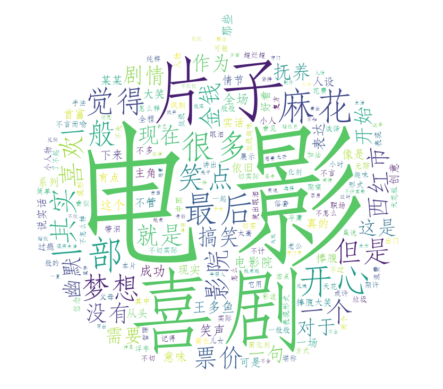

In [37]:
wc.generate_from_frequencies(word_count)  # 生成词云图
plt.figure()
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')# 去掉坐标轴
plt.show()

In [38]:
wc.to_file( '西虹市首富' + '词云.png')